In [1]:
import pandas as pd
import numpy as np
from os import path

# plots
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
#import missingno as msno
import plotly.graph_objects as go
from ipysankeywidget import SankeyWidget

%matplotlib inline

In [2]:
df_train = pd.read_csv('C:\\Users\\caste\\Desktop\\7506\\2021\\tp\data\\train_values.csv')

In [3]:
df_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0


# Primeras aproximacion

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [5]:
df_index = df_train.index
df_columns = df_train.columns
df_data = df_train.values

### Tipos de datos

In [6]:
df_train.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [7]:
df_train.dtypes.value_counts()

int64     31
object     8
dtype: int64

In [8]:
df_train.size

10163439

In [9]:
df_train.shape

(260601, 39)

In [10]:
df_train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
def valoresNulos1(columna):
    
    #counts = df_train[~df_train.iso3.isna()].iso3.value_counts()

    suma_null = columna.isnull().sum()
    total = columna.isnull().count()
    porcentaje_nulos = round(100* suma_null / total,2)
    #print (columna.name.ljust(30)  ,'{:6d}'.format(total) ,'{:19d}'.format(suma_null)  , '{:9.2f}'.format(porcentaje_nulos)+"%")
    return columna.name,total,suma_null,porcentaje_nulos

### Valores nulos

In [12]:
row=[]
for col1 in df_train.columns:
        row.append(valoresNulos1(df_train[col1]))

In [13]:
dfNulos = pd.DataFrame(row,columns=["Columna", "Total", "Cantidad Nulos", "%Nulos"]) 
dfNulos

,Columna,Total,Cantidad Nulos,%Nulos
0,building_id,260601,0,0.0
1,geo_level_1_id,260601,0,0.0
2,geo_level_2_id,260601,0,0.0
3,geo_level_3_id,260601,0,0.0
4,count_floors_pre_eq,260601,0,0.0
5,age,260601,0,0.0
6,area_percentage,260601,0,0.0
7,height_percentage,260601,0,0.0
8,land_surface_condition,260601,0,0.0
9,foundation_type,260601,0,0.0


### Matriz de correlacion

In [14]:
# supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
#'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
#'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
#'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
#'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 
#'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
#'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 
#'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
#'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 
#'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 
#'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 
#'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 
#'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 
#'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 
#'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 
#'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 
#'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 
#'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

In [15]:
cor = df_train.corr().abs()

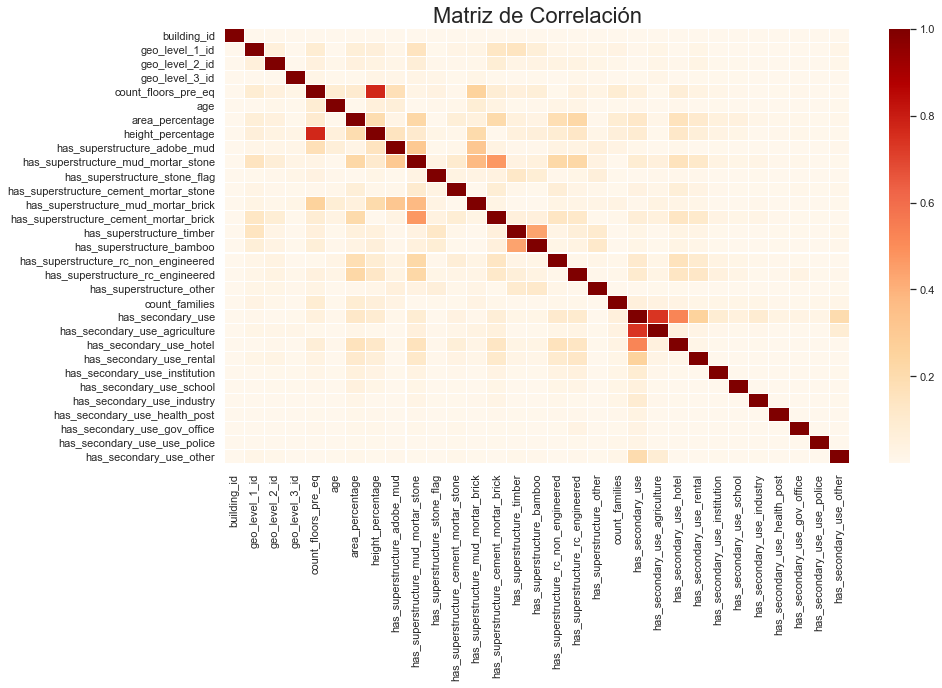

In [16]:
sns.set(font_scale=1)

fig, ax = plt.subplots(figsize=(14,8))        

sns.heatmap(cor,annot=False,linewidth = 0.05, cmap='OrRd' );
plt.title('Matriz de Correlación', fontsize=22);

In [17]:
df_train.land_surface_condition.value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

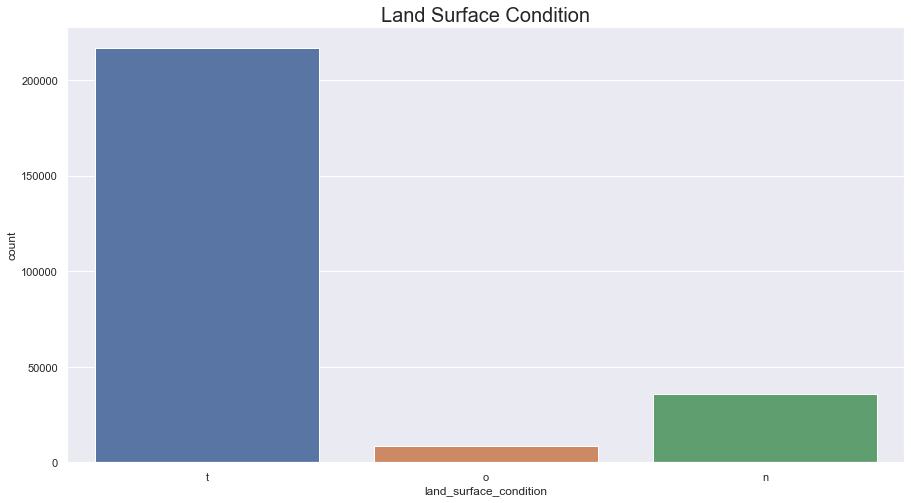

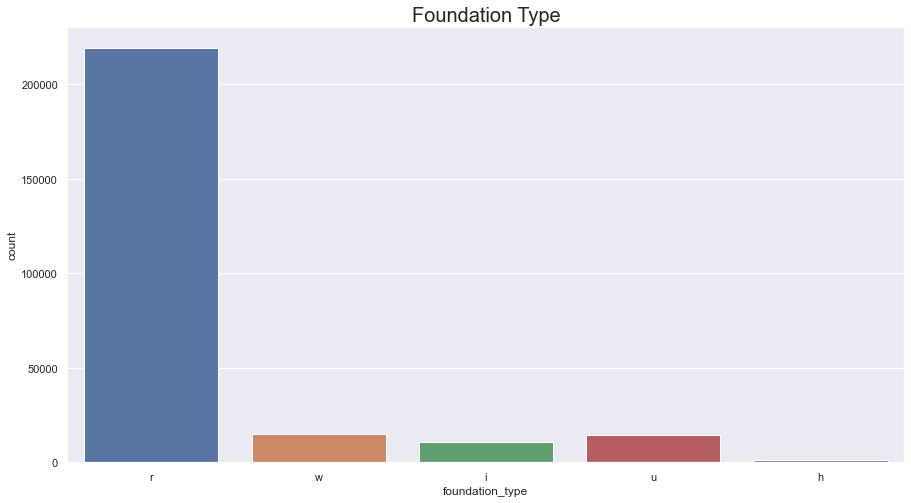

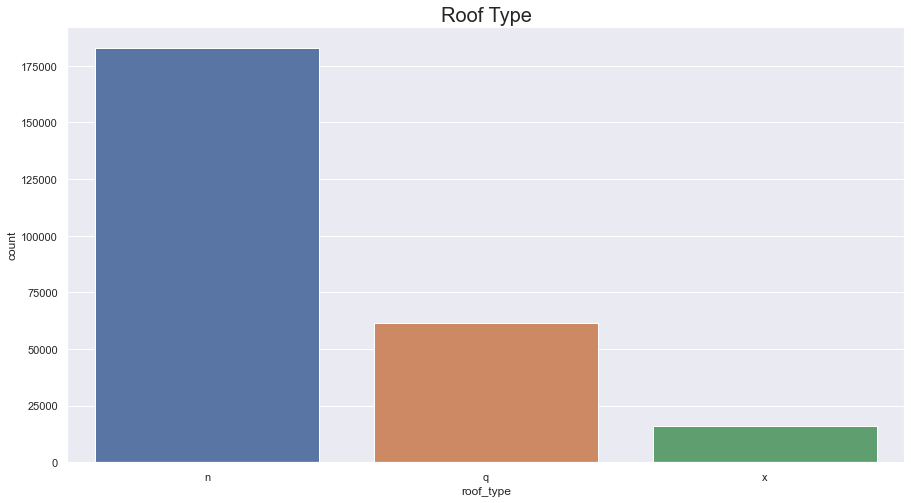

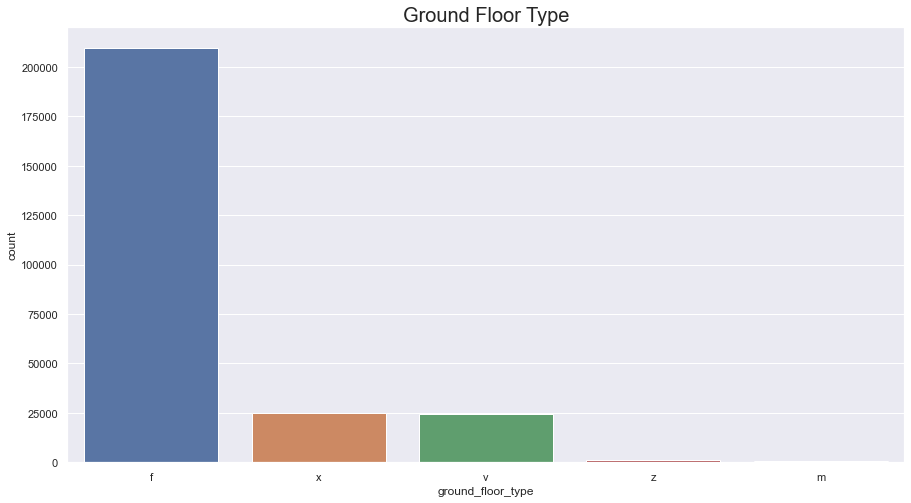

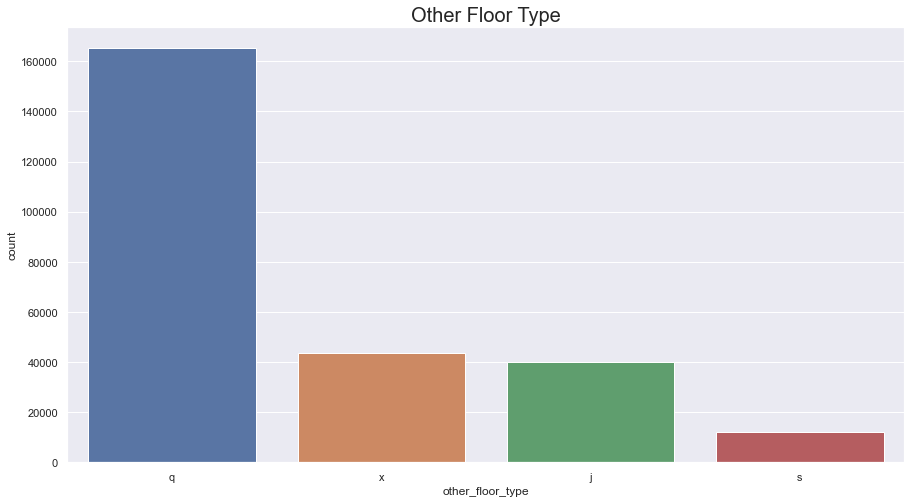

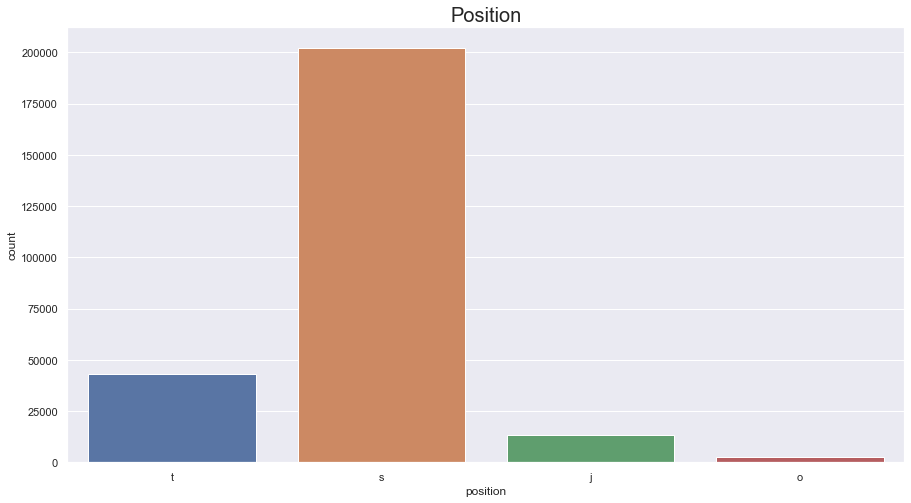

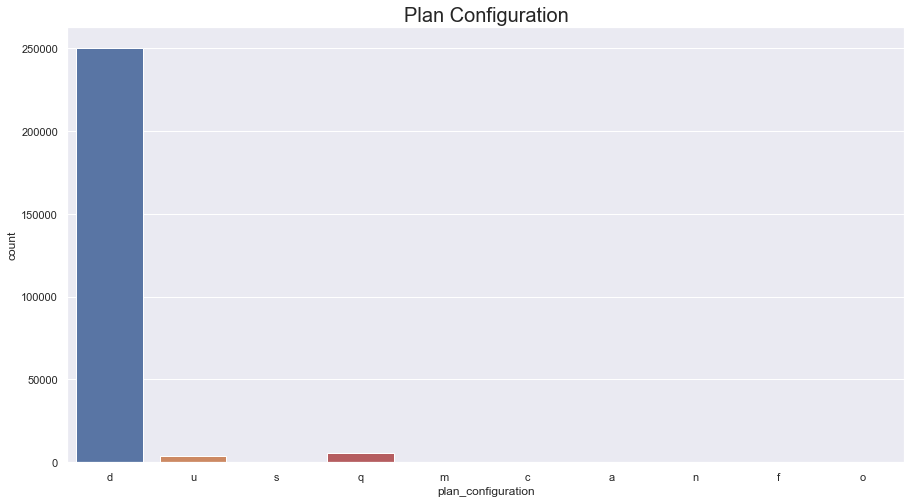

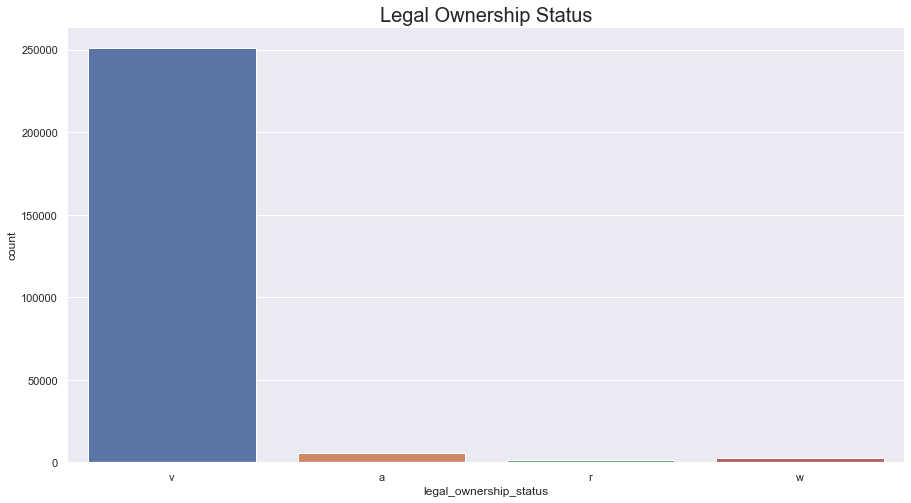

In [18]:
#columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']
columns=df_train.select_dtypes(include='object').columns.to_list()
for col_name in columns:
        plt.figure(figsize=(15,8))
        sns.countplot(x=col_name, data=df_train)
        plt.title(col_name.replace("_"," ").title(), fontsize=20)
        plt.show()

Dado que las columnas tiene pocos valores podemos covertilas a categoricas.

In [19]:
#columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']
columns=df_train.select_dtypes(include='object').columns.to_list()
for col_name in columns:
    df_train[col_name] = df_train[col_name].astype('category')


In [20]:
df_train.dtypes

building_id                                  int64
geo_level_1_id                               int64
geo_level_2_id                               int64
geo_level_3_id                               int64
count_floors_pre_eq                          int64
age                                          int64
area_percentage                              int64
height_percentage                            int64
land_surface_condition                    category
foundation_type                           category
roof_type                                 category
ground_floor_type                         category
other_floor_type                          category
position                                  category
plan_configuration                        category
has_superstructure_adobe_mud                 int64
has_superstructure_mud_mortar_stone          int64
has_superstructure_stone_flag                int64
has_superstructure_cement_mortar_stone       int64
has_superstructure_mud_mortar_b

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [22]:
#df_train_category = df_train.select_dtypes(include='category')
df_train.select_dtypes(include='number').iloc[:,4:]

,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,2,30,6,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,10,8,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,10,5,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,10,6,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,30,8,9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,1,55,6,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260597,2,0,6,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260598,3,55,6,7,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260599,2,10,14,6,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#sns.pairplot(df_train.select_dtypes(include='number').iloc[:,4:])


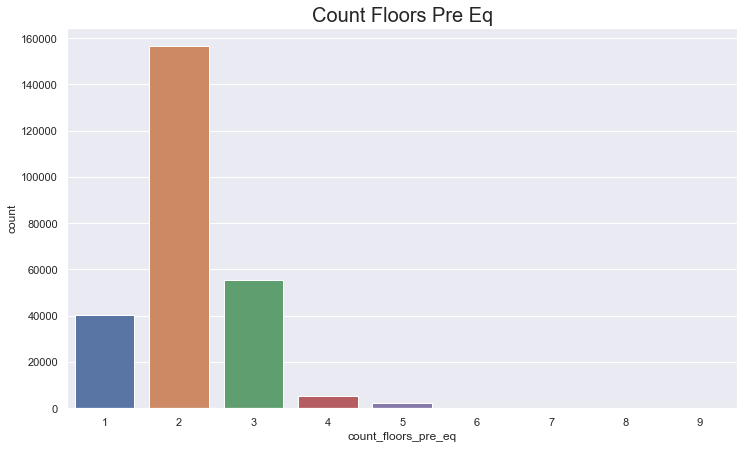

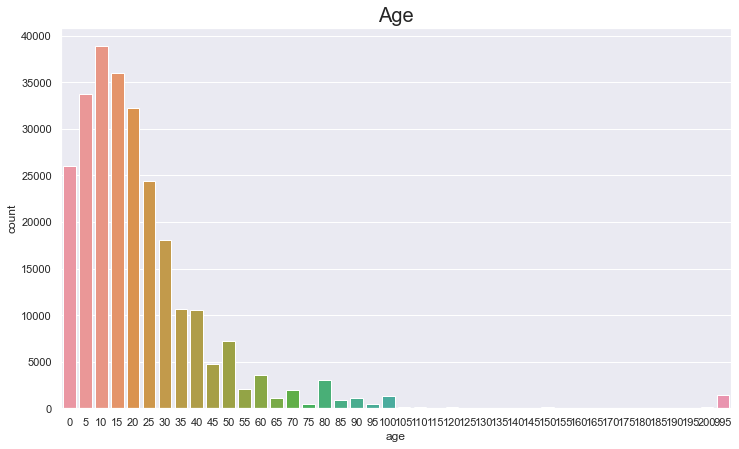

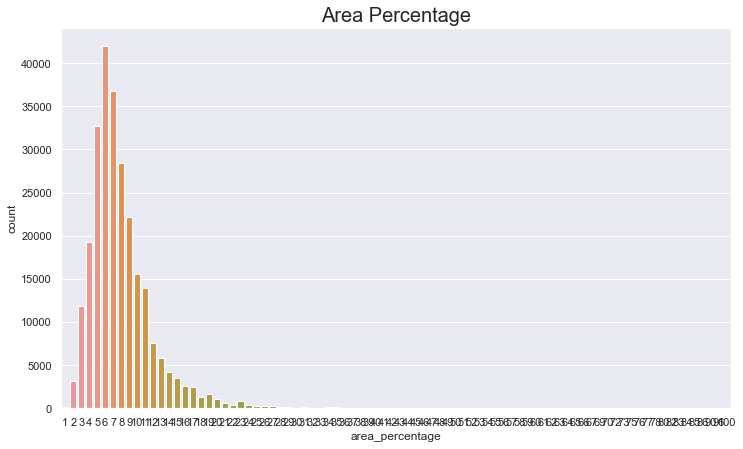

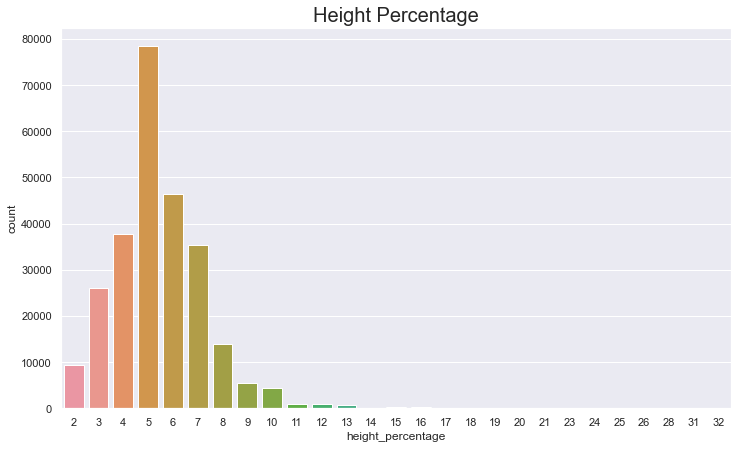

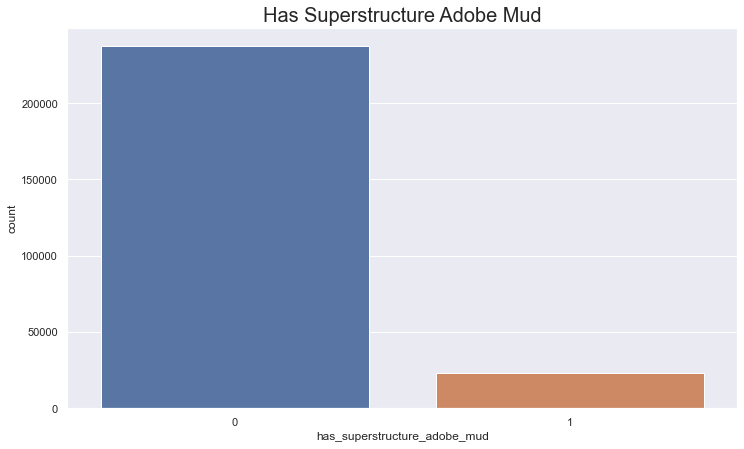

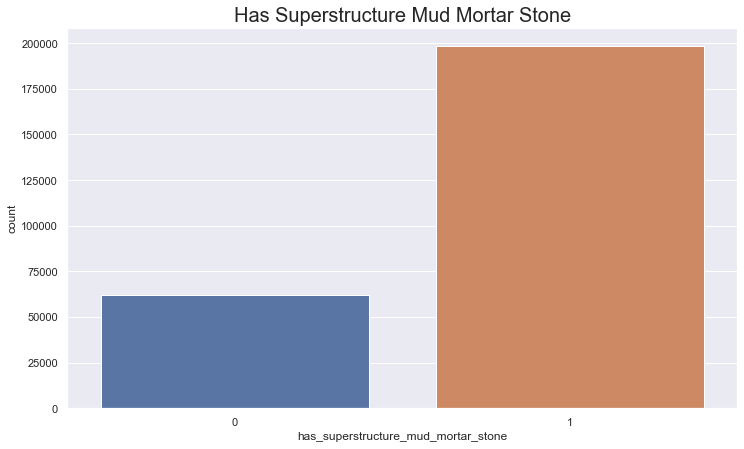

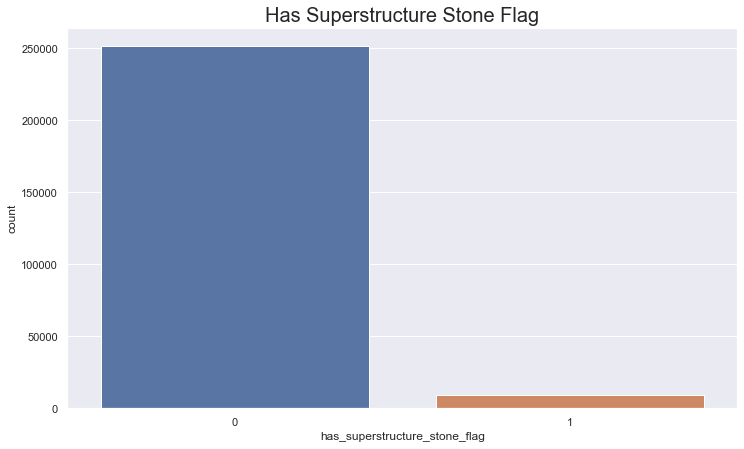

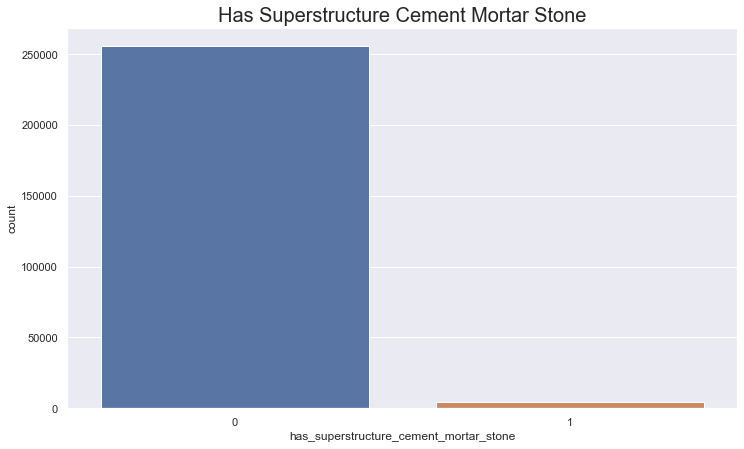

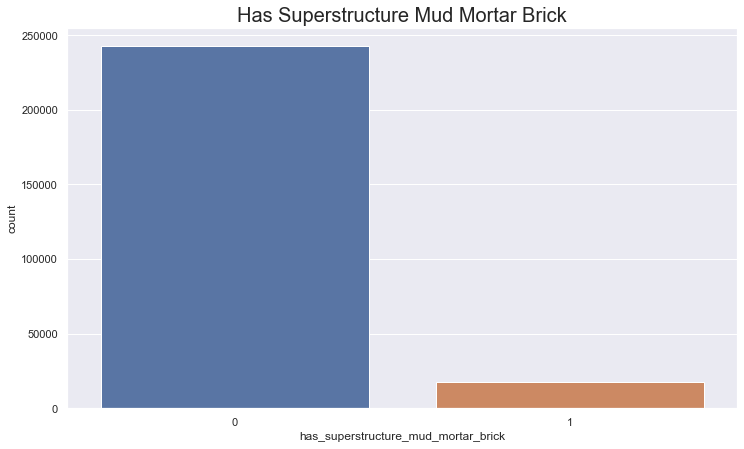

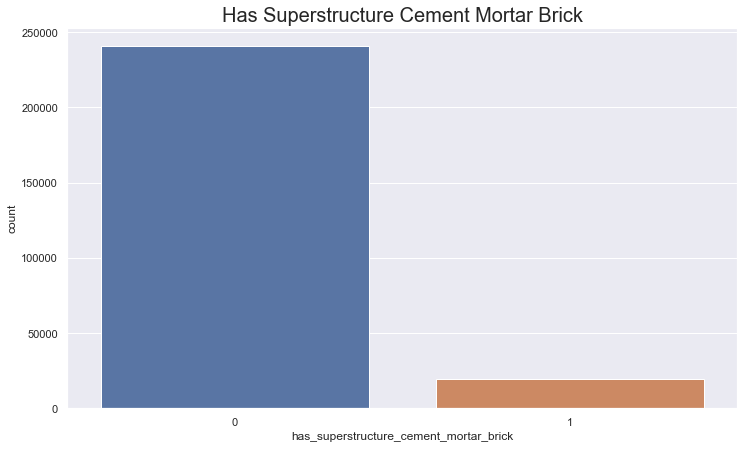

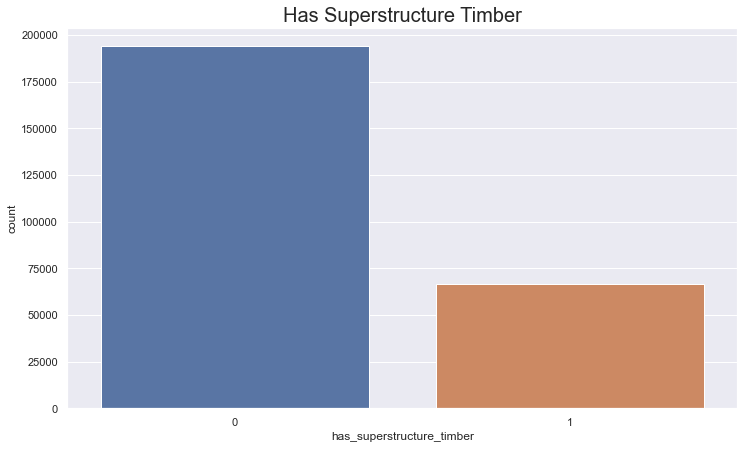

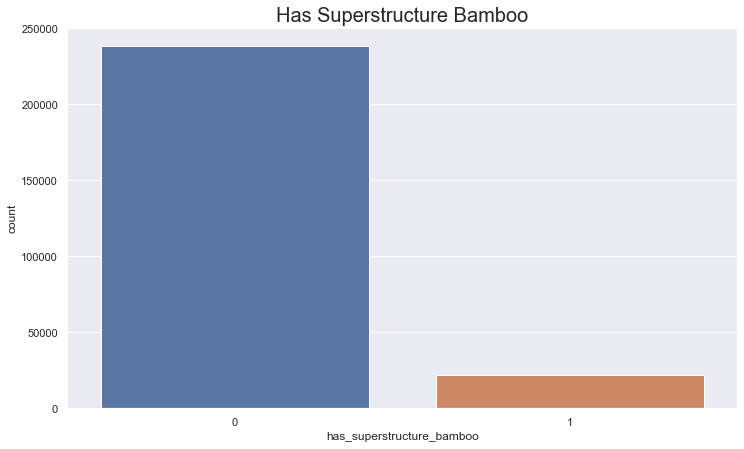

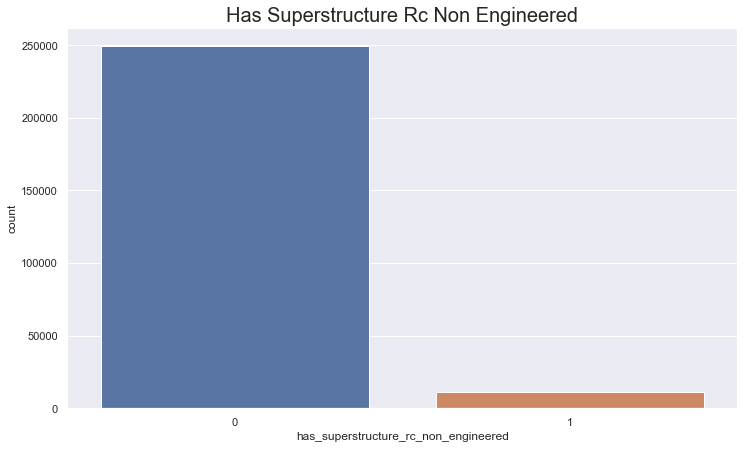

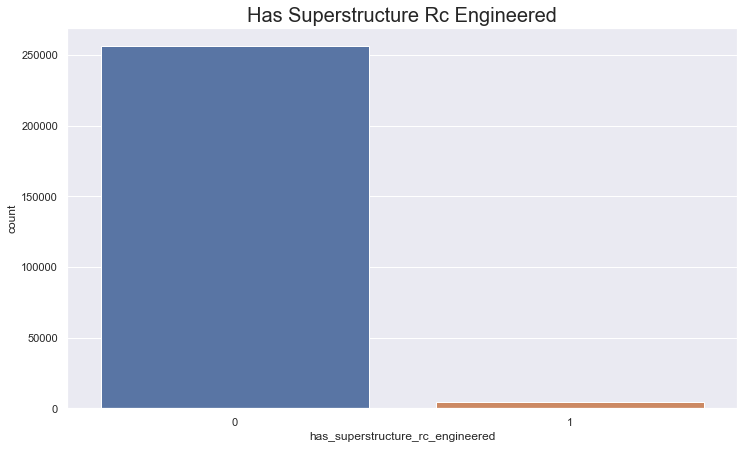

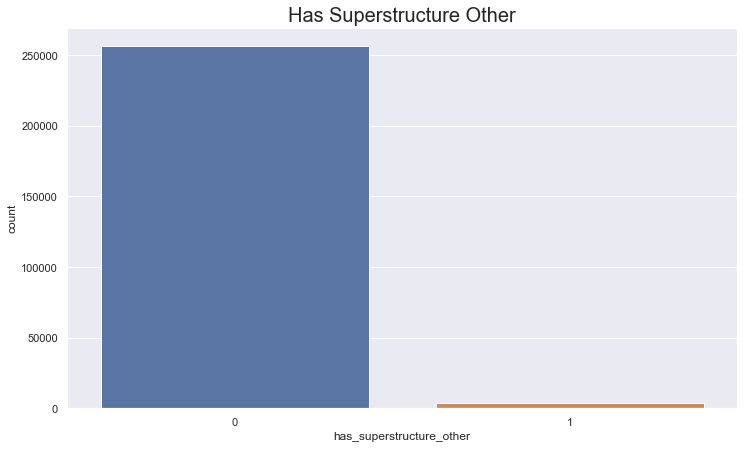

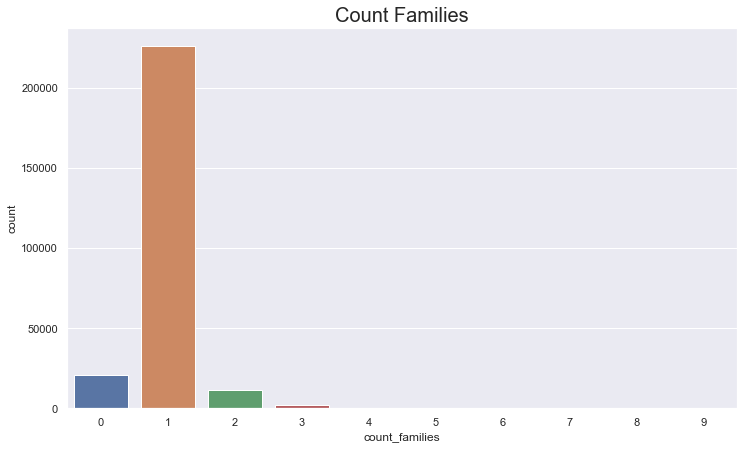

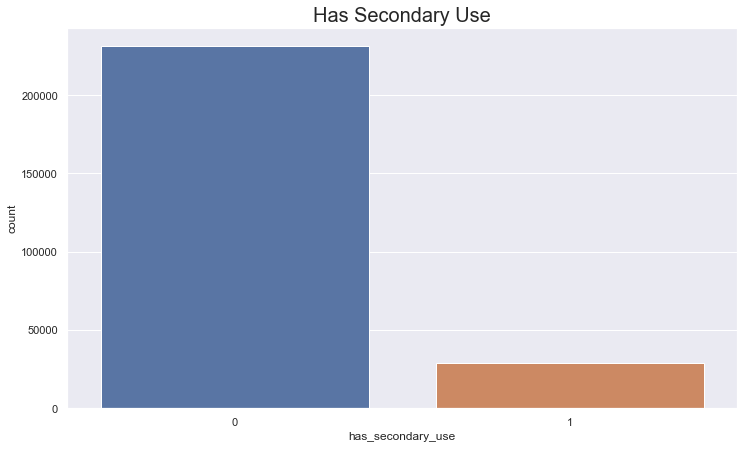

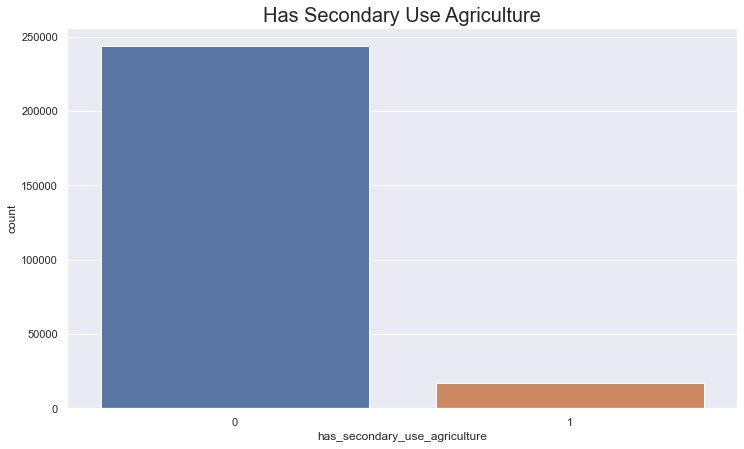

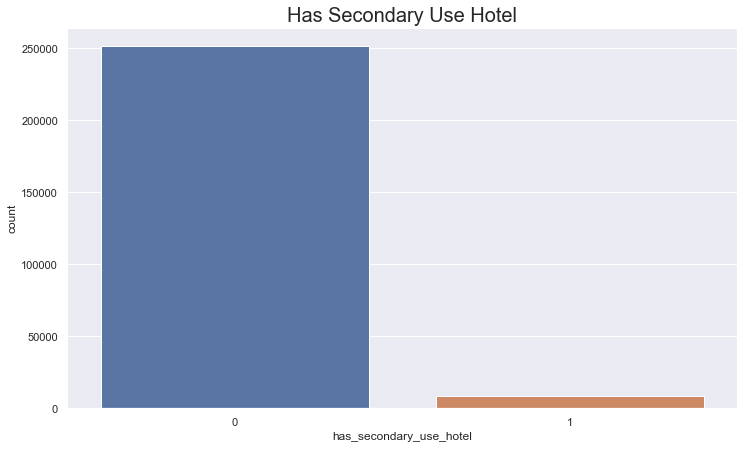

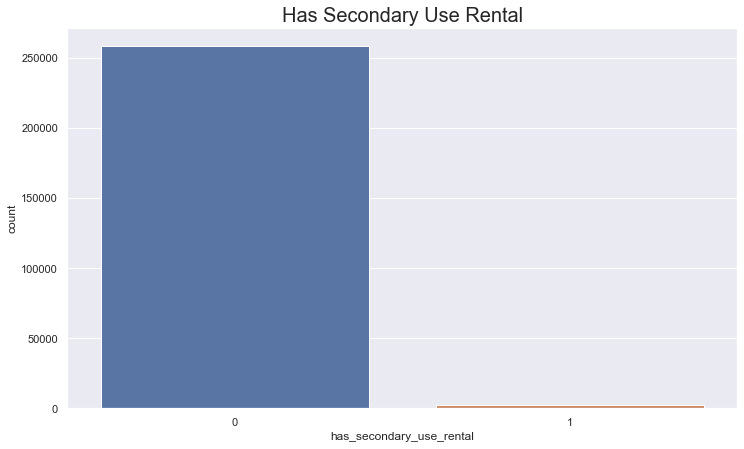

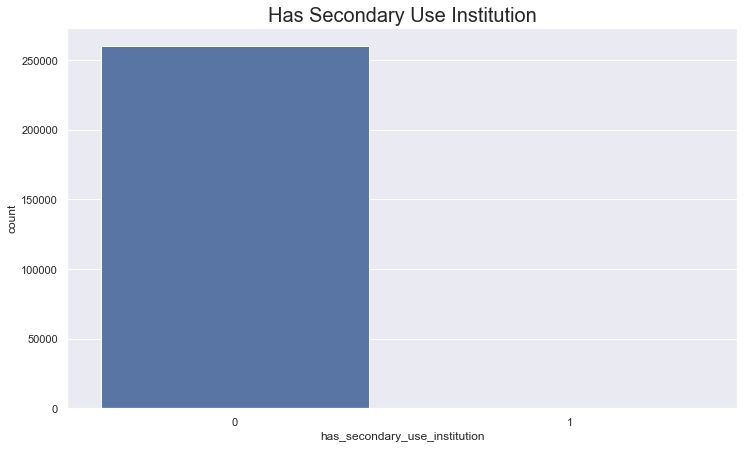

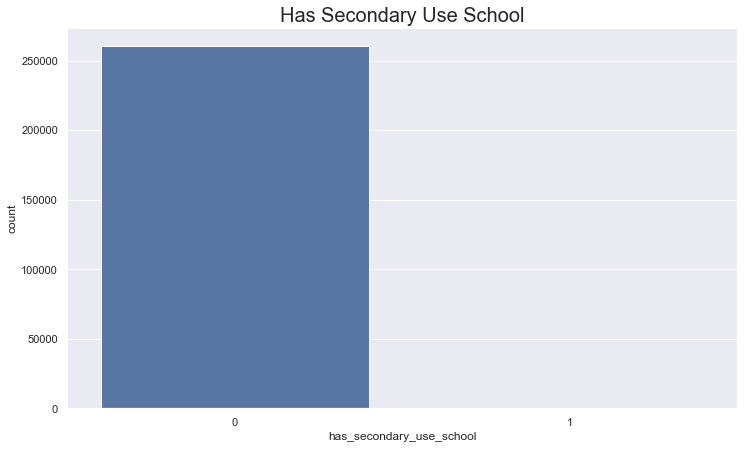

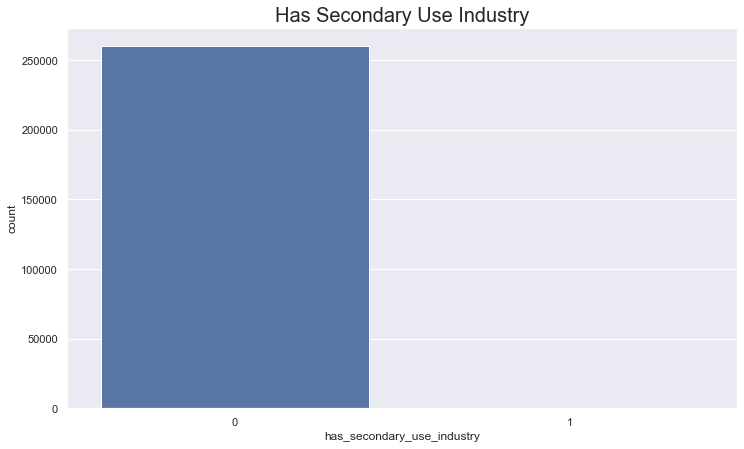

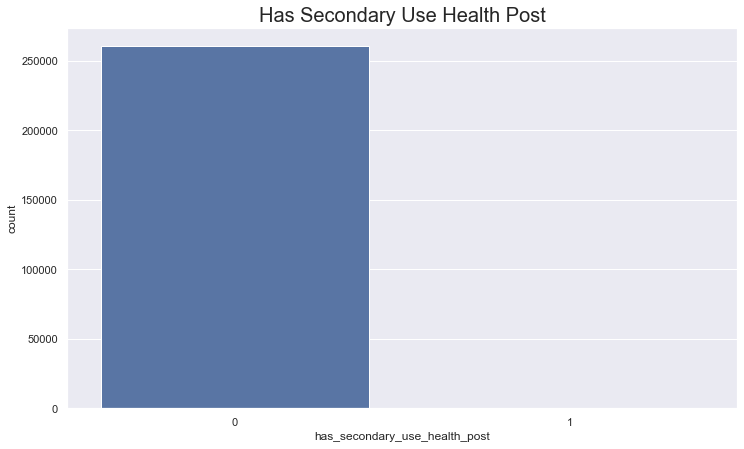

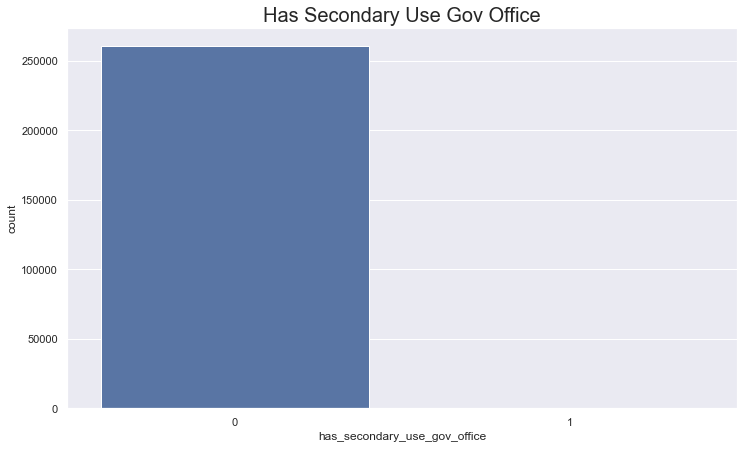

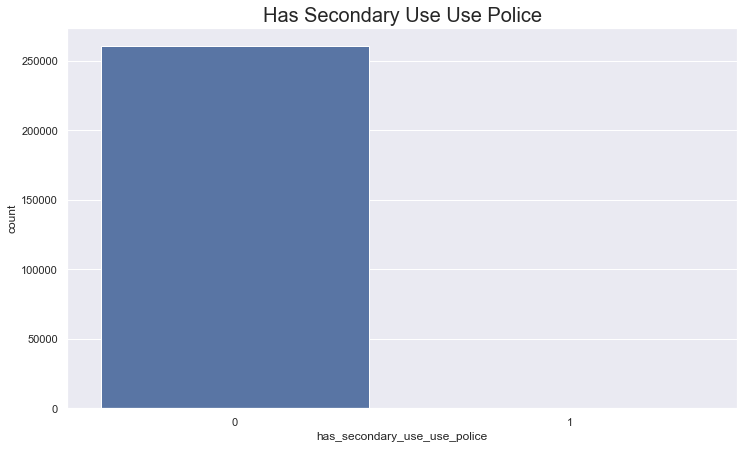

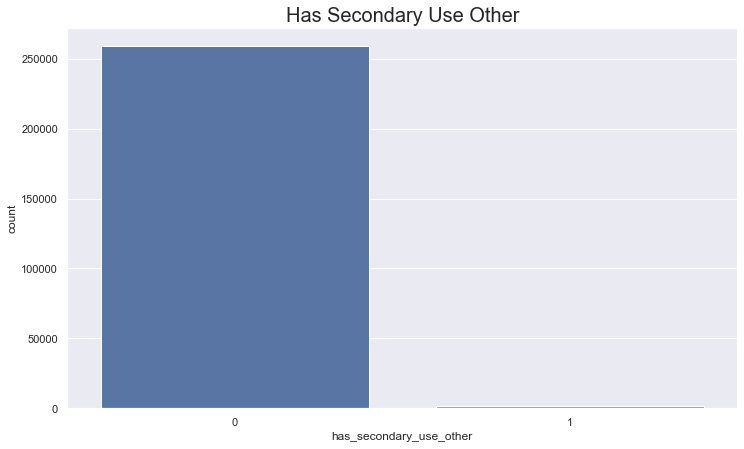

In [24]:
#columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']
columns=df_train.select_dtypes(include='number').columns.to_list()[4:]
for col_name in columns:
        plt.figure(figsize=(12,7))
        sns.countplot(x=col_name, data=df_train)
        plt.title(col_name.replace("_"," ").title(), fontsize=20)
        plt.show()

In [25]:
columns=df_train.select_dtypes(include='number').columns.to_list()[1:]
columns

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [26]:
columns

['geo_level_1_id',
 'geo_level_2_id',
 'geo_level_3_id',
 'count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [27]:
#!pip install seaborn --upgrade

<Figure size 792x360 with 0 Axes>

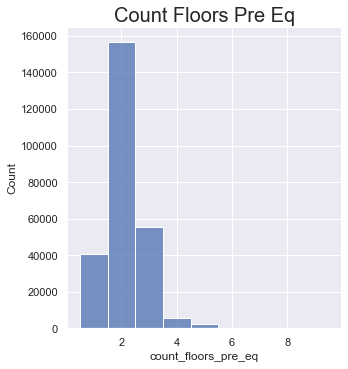

<Figure size 792x360 with 0 Axes>

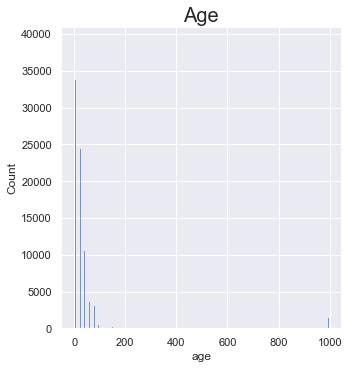

<Figure size 792x360 with 0 Axes>

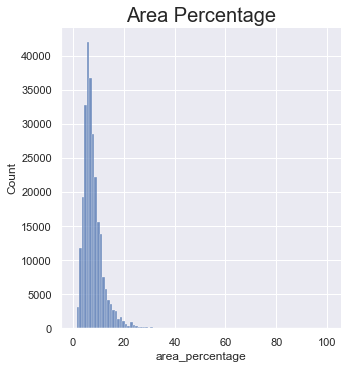

<Figure size 792x360 with 0 Axes>

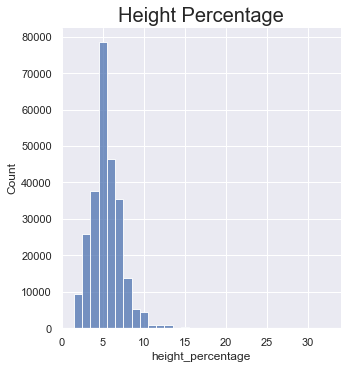

<Figure size 792x360 with 0 Axes>

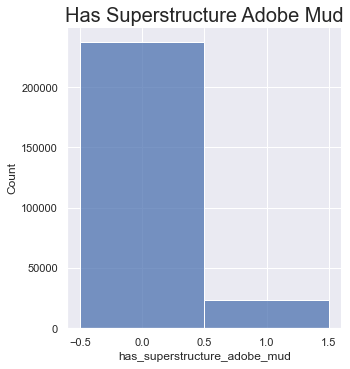

<Figure size 792x360 with 0 Axes>

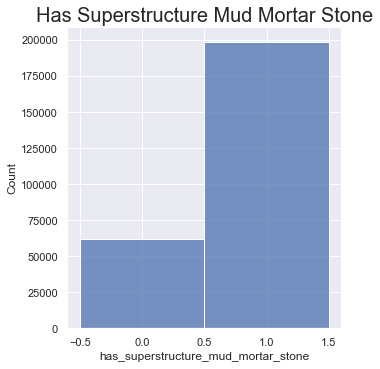

<Figure size 792x360 with 0 Axes>

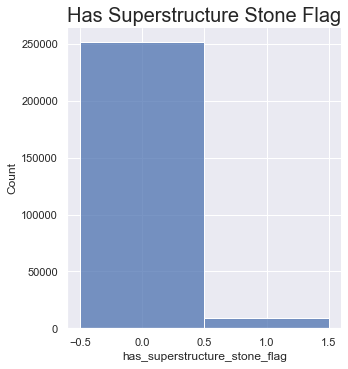

<Figure size 792x360 with 0 Axes>

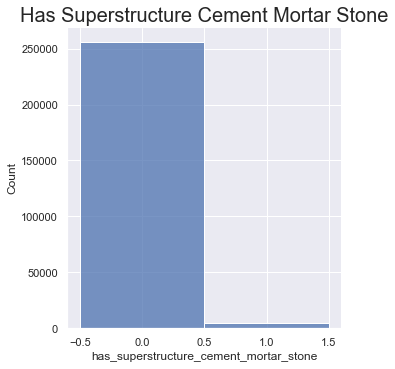

<Figure size 792x360 with 0 Axes>

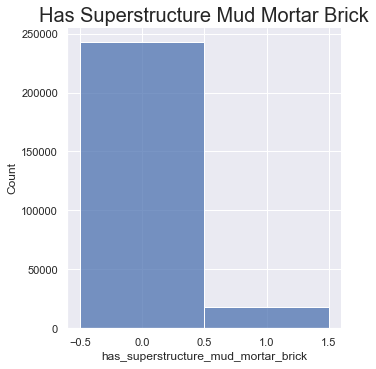

<Figure size 792x360 with 0 Axes>

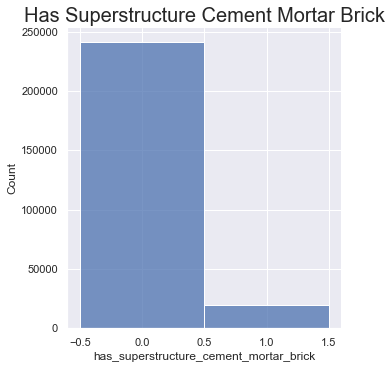

<Figure size 792x360 with 0 Axes>

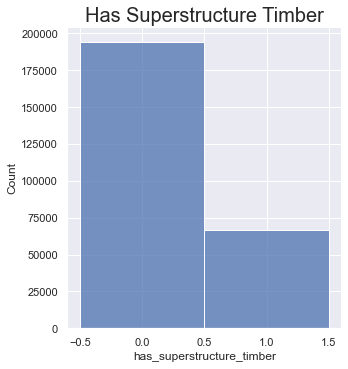

<Figure size 792x360 with 0 Axes>

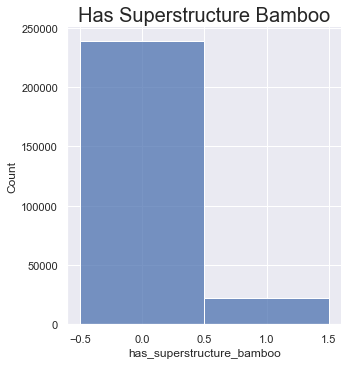

<Figure size 792x360 with 0 Axes>

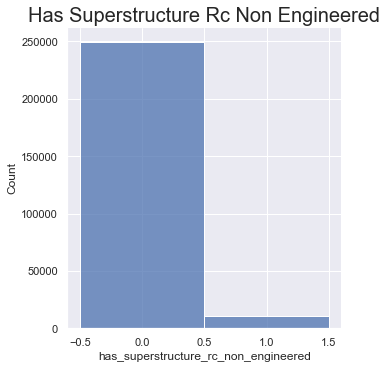

<Figure size 792x360 with 0 Axes>

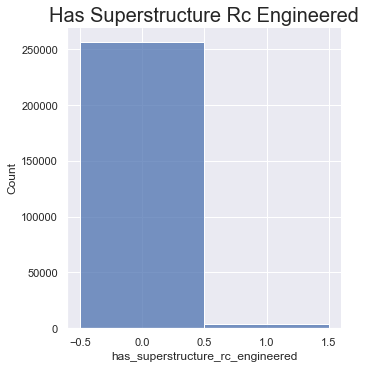

<Figure size 792x360 with 0 Axes>

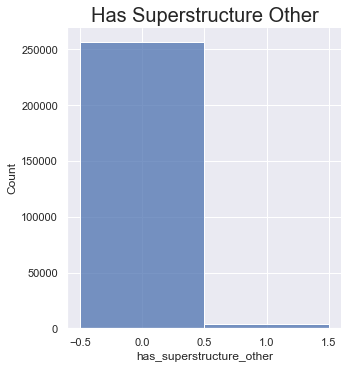

<Figure size 792x360 with 0 Axes>

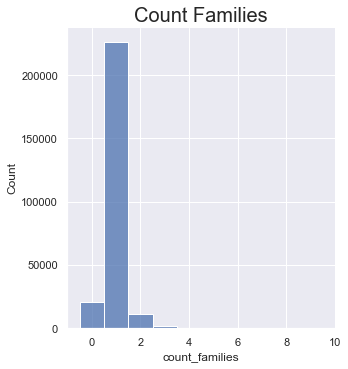

<Figure size 792x360 with 0 Axes>

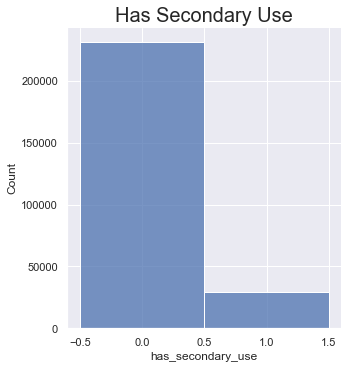

<Figure size 792x360 with 0 Axes>

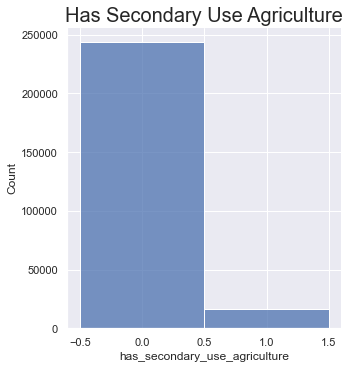

<Figure size 792x360 with 0 Axes>

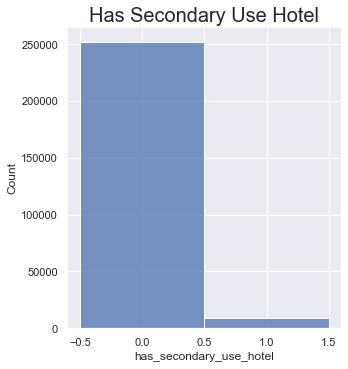

<Figure size 792x360 with 0 Axes>

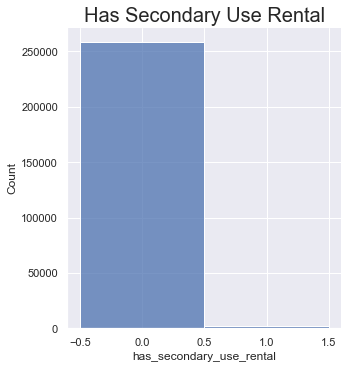

<Figure size 792x360 with 0 Axes>

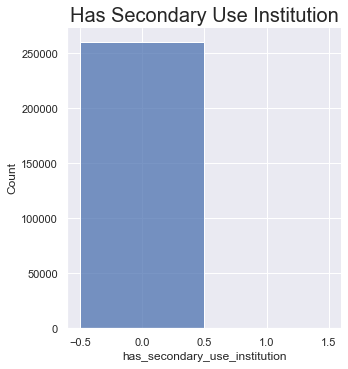

<Figure size 792x360 with 0 Axes>

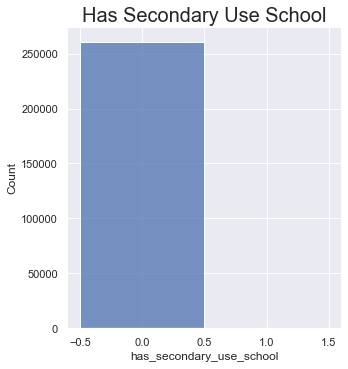

<Figure size 792x360 with 0 Axes>

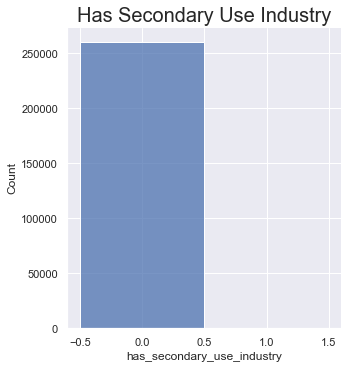

<Figure size 792x360 with 0 Axes>

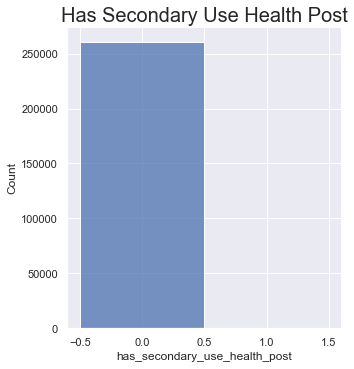

<Figure size 792x360 with 0 Axes>

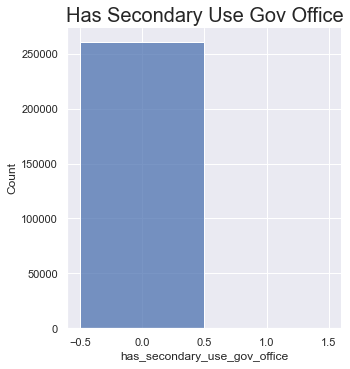

<Figure size 792x360 with 0 Axes>

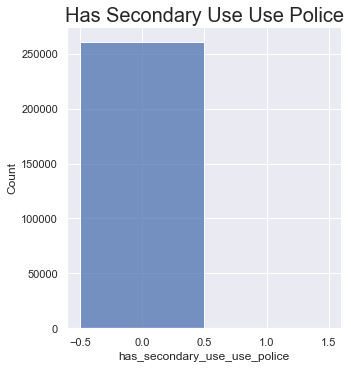

<Figure size 792x360 with 0 Axes>

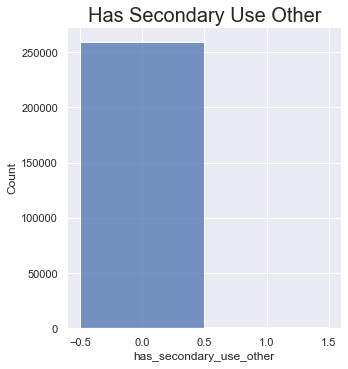

In [28]:
columns=df_train.select_dtypes(include='number').columns.to_list()[4:]
for col_name in columns:
        #sns.countplot(x=col_name, data=df_train)
        plt.figure(figsize=(11,5))
        sns.displot(df_train, x=col_name, discrete=True)
        plt.title(col_name.replace("_"," ").title(), fontsize=20)
        plt.show()

In [29]:
df_train.select_dtypes(include='number').columns.to_list()[4:]


['count_floors_pre_eq',
 'age',
 'area_percentage',
 'height_percentage',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'count_families',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

In [30]:
df_train.has_secondary_use_other.value_counts()

0    259267
1      1334
Name: has_secondary_use_other, dtype: int64

### Edad de las construcciones

In [31]:
df_train_age = df_train.age.value_counts()\
               .reset_index()\
               .rename(columns = {'index': 'ages', 'age': 'total'}, inplace = False)\
               .sort_values(by='ages',ascending=True)
#

In [32]:
df_train_age

,ages,total
4,0,26041
2,5,33697
0,10,38896
1,15,36010
3,20,32182
5,25,24366
6,30,18028
7,35,10710
8,40,10559
10,45,4711


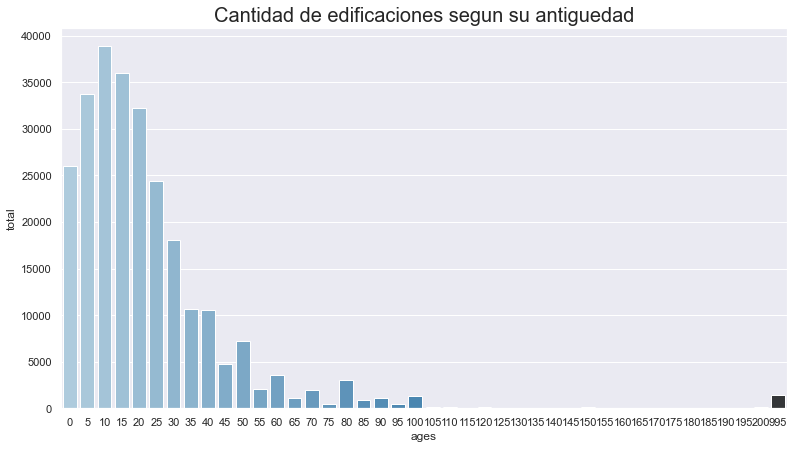

In [33]:
plt.figure(figsize=(13,7))
plt.title('Cantidad de edificaciones segun su antiguedad', fontsize=20)

sns.barplot(x="ages", y="total", data=df_train_age, palette="Blues_d")



In [34]:
df_train_age

,ages,total
4,0,26041
2,5,33697
0,10,38896
1,15,36010
3,20,32182
5,25,24366
6,30,18028
7,35,10710
8,40,10559
10,45,4711


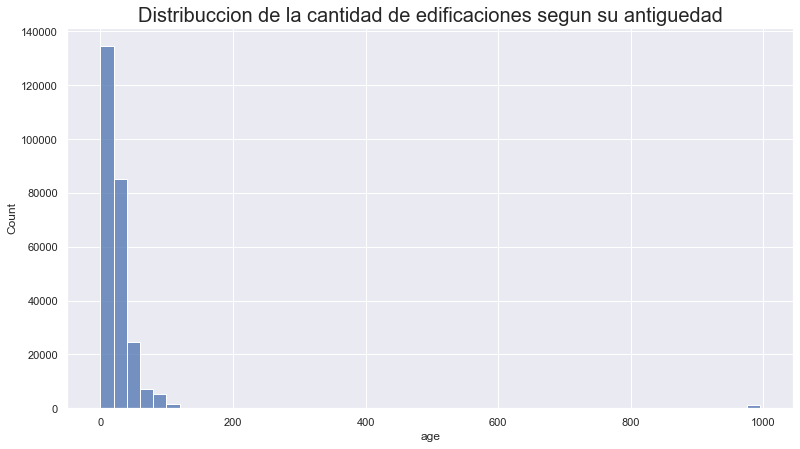

In [35]:
plt.figure(figsize=(13,7))
plt.title('Distribuccion de la cantidad de edificaciones segun su antiguedad', fontsize=20)
#sns.histplot(data=df_train_age, x="total",bins=1000 )
sns.histplot(data=df_train, x="age", bins=50)


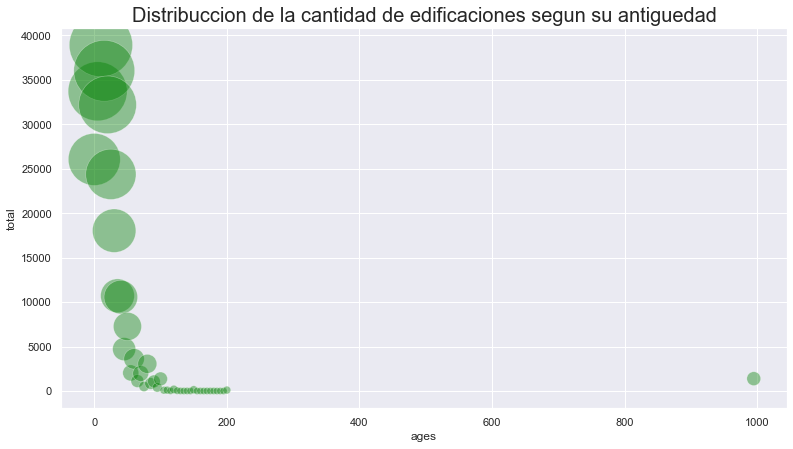

In [36]:

plt.figure(figsize=(13,7))
plt.title('Distribuccion de la cantidad de edificaciones segun su antiguedad', fontsize=20)

sns.scatterplot(data=df_train_age, x="ages", y="total", size="total", 
                 legend=False, sizes=(50, 4000), alpha=.4, color="green")



In [37]:
df_train['total'] = 1
df_train.loc[df_train.age > 800,:].groupby(['count_floors_pre_eq'])['total'].count().to_frame()

,total
count_floors_pre_eq,
1,169
2,869
3,285
4,34
5,28
6,5


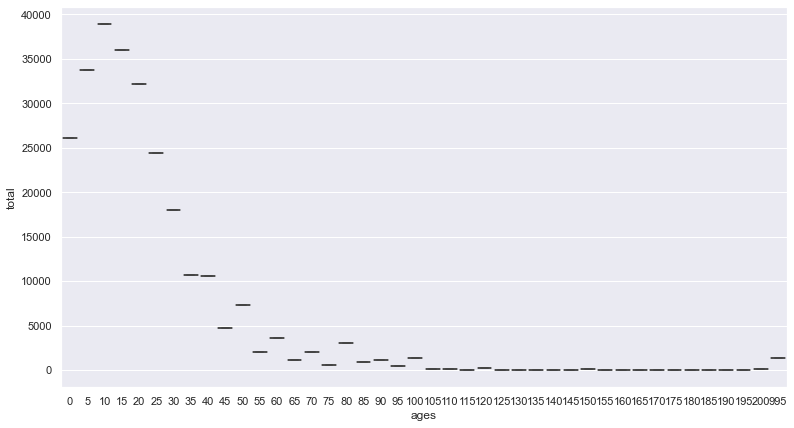

In [38]:
plt.figure(figsize=(13,7))

sns.boxplot(data = df_train_age, x='ages', y='total')


In [39]:
#sns.catplot(data=df_train_age, kind="violin", x="ages", y="total", hue="smoker", split=True)


ValueError: Could not interpret input 'smoker'

In [ ]:
#df_train_age.count_plots()
#sns.catplot(x='total',  kind="bar", data=df_train_age)
sns.displot(data=df_train_age, x="total", kde=True)



### Cuales fueron los usos de los edificios dañados

En este caso se analizaran las columnas 

> "has_secondary_use"             
> "has_secondary_use_agriculture"  
> "has_secondary_use_hotel"     
> "has_secondary_use_rental"         
> "has_secondary_use_institution"  
> "has_secondary_use_school"   
> "has_secondary_use_industry"     
> "has_secondary_use_health_post"  
> "has_secondary_use_gov_office"         
> "has_secondary_use_use_police"   
> "has_secondary_use_other"

para ver segun estas columnnas binarias cual era el uso de la construccion

In [55]:
columns_names  = ["has_secondary_use"             
,"has_secondary_use_agriculture"
,"has_secondary_use_hotel"     
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"      
,"has_secondary_use_use_police"
,"has_secondary_use_other"]
for column_name in columns_names:
    print(column_name)
    print(df_train_2[column_name].unique())

has_secondary_use
[0, 1]
Categories (2, int64): [0, 1]
has_secondary_use_agriculture
[0, 1]
Categories (2, int64): [0, 1]
has_secondary_use_hotel
[0, 1]
Categories (2, int64): [0, 1]
has_secondary_use_rental
[0, 1]
Categories (2, int64): [0, 1]
has_secondary_use_institution
[0, 1]
Categories (2, int64): [0, 1]
has_secondary_use_school
[0, 1]
Categories (2, int64): [0, 1]
has_secondary_use_industry
[0, 1]
Categories (2, int64): [0, 1]
has_secondary_use_health_post
[0, 1]
Categories (2, int64): [0, 1]
has_secondary_use_gov_office
[0, 1]
Categories (2, int64): [0, 1]
has_secondary_use_use_police
[0, 1]
Categories (2, int64): [0, 1]
has_secondary_use_other
[0, 1]
Categories (2, int64): [0, 1]


In [96]:
df_train_2.dtypes

has_secondary_use                category
has_secondary_use_agriculture    category
has_secondary_use_hotel          category
has_secondary_use_rental         category
has_secondary_use_institution    category
has_secondary_use_school         category
has_secondary_use_industry       category
has_secondary_use_health_post    category
has_secondary_use_gov_office     category
has_secondary_use_use_police     category
has_secondary_use_other          category
sum_uses                          float64
dtype: object

In [93]:
df_train["sum_of_uses"] = df_train.loc[:,["has_secondary_use"             
,"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"
,"has_secondary_use_other"]].sum(axis=1)

In [94]:
df_train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,total,sum_of_uses
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,1,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,1,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,1,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,1,0


In [95]:
df_train.sum_of_uses.value_counts()

0    231445
2     28599
3       557
Name: sum_of_uses, dtype: int64

In [104]:
df_train.loc[df_train.sum_of_uses==3,["has_secondary_use"             
,"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"
,"has_secondary_use_other","sum_of_uses"]]

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,sum_of_uses
304,1,1,0,0,0,0,0,0,0,0,1,3
1408,1,1,0,0,0,0,0,0,0,0,1,3
1593,1,1,0,0,0,0,0,0,0,0,1,3
2329,1,1,0,0,0,0,0,0,0,0,1,3
3704,1,0,1,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
256746,1,1,0,0,0,0,0,0,0,0,1,3
257939,1,1,0,0,0,0,0,0,0,0,1,3
258184,1,1,0,0,0,0,0,0,0,0,1,3
258755,1,1,0,0,0,0,0,0,0,0,1,3


In [106]:
df_train["sum_of_uses_2"] = df_train.loc[:,[        
"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"]].sum(axis=1)

In [107]:
df_train.sum_of_uses_2.value_counts()

0    232222
1     28379
Name: sum_of_uses_2, dtype: int64

In [150]:
df_train_uses = df_train.loc[:,["building_id",             
"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"]]

In [151]:
df_train_uses

,building_id,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police
0,802906,0,0,0,0,0,0,0,0,0
1,28830,0,0,0,0,0,0,0,0,0
2,94947,0,0,0,0,0,0,0,0,0
3,590882,0,0,0,0,0,0,0,0,0
4,201944,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
260596,688636,0,0,0,0,0,0,0,0,0
260597,669485,0,0,0,0,0,0,0,0,0
260598,602512,0,0,0,0,0,0,0,0,0
260599,151409,0,0,0,0,0,0,0,0,0


In [152]:
df_train_uses["sum"] = df_train_uses.loc[:,[            
"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"]].sum(axis=1)

In [132]:
#df_train_uses['sum'].value_counts()

0    232222
1     28379
Name: sum, dtype: int64

Se omiten las columnas others para el analisis ya que generalmente estan acompñadas por una de estas columnas

In [156]:
df_train_uses["type_of_use"] = df_train_uses.loc[:,[            
"has_secondary_use_agriculture"   
,"has_secondary_use_hotel"           
,"has_secondary_use_rental"         
,"has_secondary_use_institution" 
,"has_secondary_use_school"  
,"has_secondary_use_industry"
,"has_secondary_use_health_post"
,"has_secondary_use_gov_office"       
,"has_secondary_use_use_police"]].idxmax(axis = 1, skipna = True)

In [158]:
df_train_uses

,building_id,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,sum,type_of_use
0,802906,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
1,28830,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
2,94947,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
3,590882,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
4,201944,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
260597,669485,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
260598,602512,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture
260599,151409,0,0,0,0,0,0,0,0,0,0,has_secondary_use_agriculture


In [157]:
df_train_uses[df_train_uses.building_id==333020]

,building_id,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,sum,type_of_use
5,333020,1,0,0,0,0,0,0,0,0,1,has_secondary_use_agriculture


In [159]:
df_train_uses['type_of_use'] = df_train_uses.loc[df_train_uses['sum'] == 1,'type_of_use'].replace({'has_secondary_use_':''},regex=True)

In [161]:
df_train_uses[df_train_uses['sum'] == 1]

,building_id,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,sum,type_of_use
5,333020,1,0,0,0,0,0,0,0,0,1,agriculture
20,793397,1,0,0,0,0,0,0,0,0,1,agriculture
26,973909,1,0,0,0,0,0,0,0,0,1,agriculture
45,440102,0,0,1,0,0,0,0,0,0,1,rental
57,552720,1,0,0,0,0,0,0,0,0,1,agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...
260579,977263,1,0,0,0,0,0,0,0,0,1,agriculture
260584,317439,1,0,0,0,0,0,0,0,0,1,agriculture
260587,603159,1,0,0,0,0,0,0,0,0,1,agriculture
260591,560805,1,0,0,0,0,0,0,0,0,1,agriculture


In [175]:
df_train_uses['type_of_use'].value_counts().sort_values(ascending=False)

agriculture    16777
hotel           8763
rental          2111
industry         279
institution      245
school            94
health_post       49
gov_office        38
use_police        23
Name: type_of_use, dtype: int64

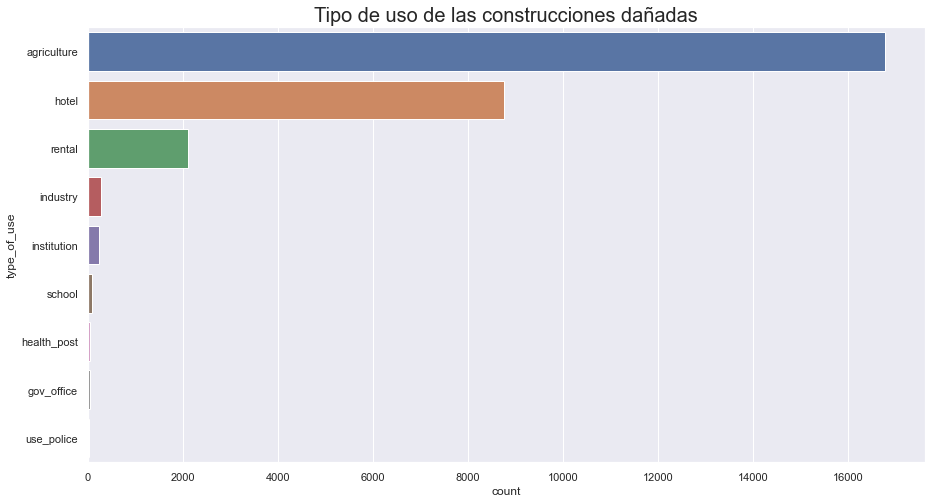

In [177]:
plt.figure(figsize=(15,8))
sns.countplot(y='type_of_use', data=df_train_uses ,order = df_train_uses['type_of_use'].value_counts().index)
plt.title('Tipo de uso de las construcciones dañadas', fontsize=20)
plt.show()

Conclusion

Las construcciones principalmente afectadas fueron las agricolas. Se observa un importante daño tambien en lo que son edificaciones de hoteleria, 

Cabe aclarar que para este caso finalmente tuvimos que omitir las columnas o has_secondary_use y has_secondary_use_other

In [171]:
df_train['has_secondary_use_hotel'].value_counts()

0    251838
1      8763
Name: has_secondary_use_hotel, dtype: int64